In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_auctions = pd.read_csv('../procurement_auction_data/Licitações.csv', encoding='cp1252', sep=';')
df_auctions.head()

,Número Licitação,Código UG,Nome UG,Código Modalidade Compra,Modalidade Compra,Número Processo,Objeto,Situação Licitação,Código Órgão Superior,Nome Órgão Superior,Código Órgão,Nome Órgão,UF,Município,Data Resultado Compra,Data Abertura,Valor Licitação
0,12012,170120,DELEGACIA DA RFB EM CAMPOS GOYTACAZES,5,Pregão,15528000001201224,Objeto: Pregão Eletrônico - Contratação de emp...,Publicado,25000,Ministério da Fazenda,25000,Ministério da Fazenda - Unidades com víncul,RJ,CAMPOS DOS GOYTACAZES,02/01/2013,27/12/2012,"28296,0000"
1,12012,510918,GERENCIA EXECUTIVA PASSO FUNDO,5,Pregão,35274000865201282,Objeto: Pregão Eletrônico - Aquisição de órtes...,Evento de Alteração Publicad,33000,Ministério da Previdência Social,37202,Instituto Nacional do Seguro Social,RS,PASSO FUNDO,10/01/2013,14/12/2012,"166738,0000"
2,12012,580025,SUPERINT.FED.DE PESCA E AQUICULTURA/PB,5,Pregão,00365001949201230,Objeto: Pregão Eletrônico - Prestação de servi...,Evento de Retificação Divulg,58000,Ministério da Pesca e Aquicultura,58000,Ministério da Pesca e Aquicultura - Unidades,PB,CABEDELO,11/01/2013,19/12/2012,"60597,6000"
3,12013,925145,REGIONAL DE TRANSMISSÃO DO PARÁ,5,Pregão,1,Objeto: Pregão Eletrônico - Aquisição de termo...,Publicado,20101,Sem informação,91081,FURNAS-CENTRAIS ELETRICAS S.A.,-3,Inválido,28/01/2013,25/01/2013,"0,00"
4,12013,925150,TELECOMUNICAÇÕES BRASILEIRAS S.A.,5,Pregão,501/2012-TB,Objeto: Pregão Eletrônico - Contratação de emp...,Publicado,20000,PRESIDENCIA DA REPUBLICA - PRES,41000,MINISTERIO DAS COMUNICACOES - MINC,-3,Inválido,31/01/2013,18/01/2013,"65093,7900"


# Analysis of Procurement Times in Brazilian Public Auctions

This analysis examines the time between auction opening and result publication
for different management units (Unidades Gestoras - UGs) in Brazilian public procurement.

Important caveats:
1. The measured time (Data Resultado Compra - Data Abertura) represents only the formal auction process
2. It does not include:
   - Pre-auction planning and preparation
   - Post-auction contract execution
   - Logistics and delivery time
   - Administrative processing delays
3. Data Resultado Compra represents the publication date of results in the Official Gazette
4. Data Abertura represents the opening date for proposal submissions

The analysis will show:
- Average procurement times by management unit
- Top 20 units with longest/shortest processing times
- Statistical distribution of processing times

This helps identify potential bottlenecks and best practices in the procurement process

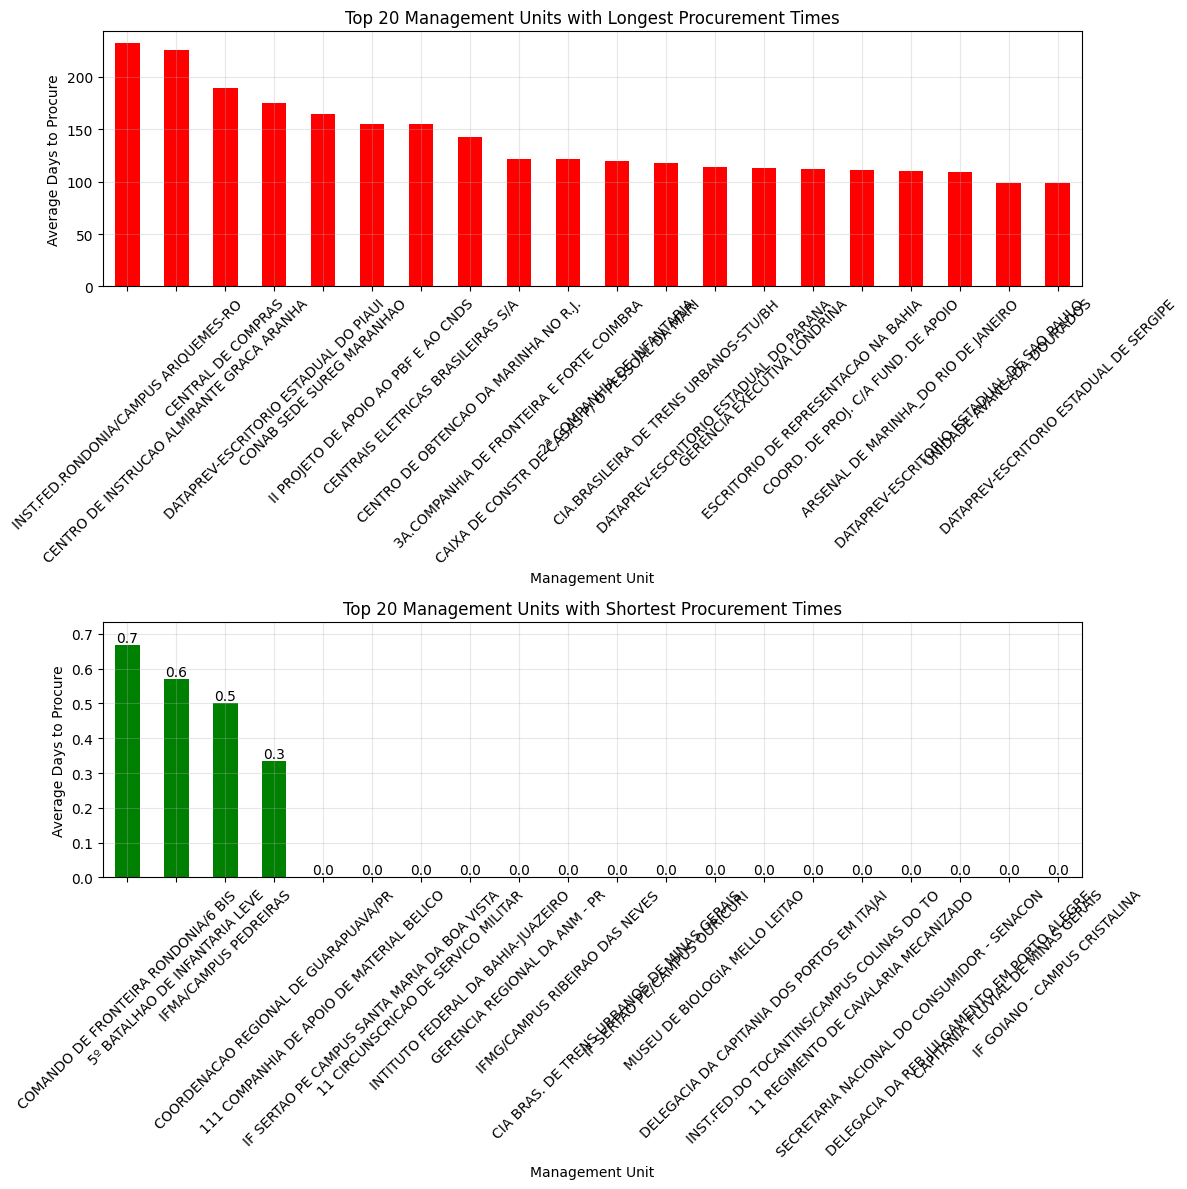


Time to Procure Statistics by Management Unit (in days):
                                               count       mean        std  \
Nome UG                                                                      
1 BATALHAO DE COMUNICACOES                      37.0  14.000000  24.485824   
1 BATALHAO DE GUARDA                            10.0  18.300000  14.491760   
1 BATALHAO DE INFANTARIA DE SELVA(AEROMOVEL)     5.0  12.600000  14.081903   
1 BATALHAO DE POLICIA DO EXERCITO                3.0  40.333333  20.008332   
1 BATALHAO FERROVIARIO                          30.0  10.066667  13.680929   
...                                              ...        ...        ...   
UTFPR CAMPUS SANTA HELENA                       59.0   7.542373  11.543504   
UTFPR- CAMPUS FRANCISCO BELTRAO                 96.0  14.947917  38.031115   
VALEC ENGENHARIA, CONSTRUCOES E FERROVIAS S.A   81.0  28.111111  29.771211   
VI CUPULA DO BRICS                               3.0  13.000000   2.000000   
]NST.F

In [3]:
# Convert date columns to datetime
df_auctions['Data Resultado Compra'] = pd.to_datetime(df_auctions['Data Resultado Compra'], format='%d/%m/%Y')
df_auctions['Data Abertura'] = pd.to_datetime(df_auctions['Data Abertura'], format='%d/%m/%Y')

# Calculate time to procure (in days) and ensure it's positive
df_auctions['Time to Procure'] = (df_auctions['Data Resultado Compra'] - df_auctions['Data Abertura']).dt.days
df_auctions['Time to Procure'] = df_auctions['Time to Procure'].abs()  # Convert negative values to positive

# Group by management unit and calculate average time to procure
time_by_unit = df_auctions.groupby('Nome UG')['Time to Procure'].mean().sort_values(ascending=False)

# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot worst 20 (highest average days)
time_by_unit.head(20).plot(kind='bar', ax=ax1, color='red')
ax1.set_title('Top 20 Management Units with Longest Procurement Times')
ax1.set_xlabel('Management Unit')
ax1.set_ylabel('Average Days to Procure')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Plot best 20 (lowest average days)
time_by_unit.tail(20).plot(kind='bar', ax=ax2, color='green')
ax2.set_title('Top 20 Management Units with Shortest Procurement Times')
ax2.set_xlabel('Management Unit')
ax2.set_ylabel('Average Days to Procure')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

# Add value labels on top of each bar
for i, v in enumerate(time_by_unit.tail(20)):
    ax2.text(i, v, f'{v:.1f}', ha='center', va='bottom')

# Adjust y-axis to accommodate labels
ax2.set_ylim(0, time_by_unit.tail(20).max() * 1.1)

plt.tight_layout()
plt.show()

# Print statistics by management unit
print("\nTime to Procure Statistics by Management Unit (in days):")
print(df_auctions.groupby('Nome UG')['Time to Procure'].describe())